# Assoziaionsanlayse

Untersucht wird nur der Datensatz der Rotweine (~1600 Zeilen).
Der Datensatz der Weißweine ist zu groß (~5000 Zielen).

## Setup

In [30]:
# Setup
from mlxtend.frequent_patterns import apriori, association_rules
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas.plotting

In [31]:
# Info über Spalten (detusche Übersetzungen, ...)
columns = {
    "fixed acidity": {
        "de": "Fester Säuregehalt [g/L]",
    },
    "volatile acidity": {
        "de": "Flüchtiger Säuregehalt [g/L]",
    },
    "citric acid": {
        "de": "Citronensäure [g/L]",
    },
    "residual sugar": {
        "de": "Restzucker [g/L]",
        "fixed_filter": 10.0,
    },
    "chlorides": {
        "de": "Chloride [g/L]",
        "fixed_filter": 0.3,
    },
    "free sulfur dioxide": {
        "de": "Freie Schwefeloxide [mg/L]",
    },
    "total sulfur dioxide": {
        "de": "Schwefeloxide [mg/L]",
    },
    "density": {
        "de": "Dichte [g/cm3]",
    },
    "pH": {
        "de": "pH-Wert",
    },
    "sulphates": {
        "de": "Sulfate [g/L]",
    },
    "alcohol": {
        "de": "Alkohol [vol.%]",
    },
    "quality": {
        "de": "Qualität",
    },
}

In [32]:
# Einelsen der Daten
df_red = pd.read_csv('winequality-red.csv', sep=';', header=0) 
df_white = pd.read_csv('winequality-white.csv', sep=';', header=0) 

## Bereinigung der Daten

### Null-Werte

In [33]:
# Null-Werte prüfen
print(df_red.isna().sum().sum())
#print(df_white.isna().sum().sum())

0


### Ausreißer

In [34]:
def hist(df):
    fig = plt.figure(
        num="Histogramm",
        figsize=(12,9),
    )
    fig.subplots_adjust(hspace=0.4, wspace=0.5)

    for i, column in enumerate(columns.keys()):
        f = fig.add_subplot(4, 3, i+1)
        f.set_title(columns[column]["de"])
        f.hist(df[column], bins=20)
        f.axvline(df[column].mean(), color='k', linestyle='dashed', linewidth=1)
        # TODO: print outliers red
        # (https://stackoverflow.com/questions/49290266/python-matplotlib-histogram-specify-different-colours-for-different-bars)

    plt.show()

def box_plot(df):
    fig = plt.figure(
        num="Box Plot",
        figsize=(12,9),
    )
    fig.subplots_adjust(hspace=0.4, wspace=0.5)

    for i, column in enumerate(columns.keys()):
        f = fig.add_subplot(4, 3, i+1)
        f.set_title(columns[column]["de"])
        f.boxplot(df[column], vert=False)

    plt.show()

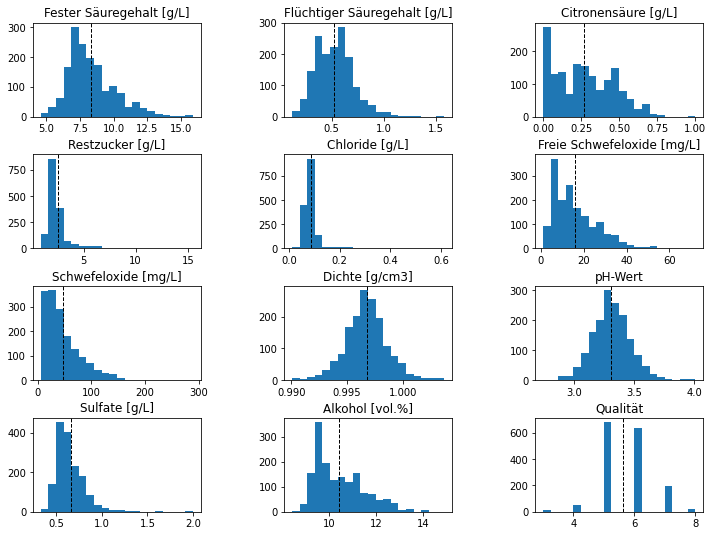

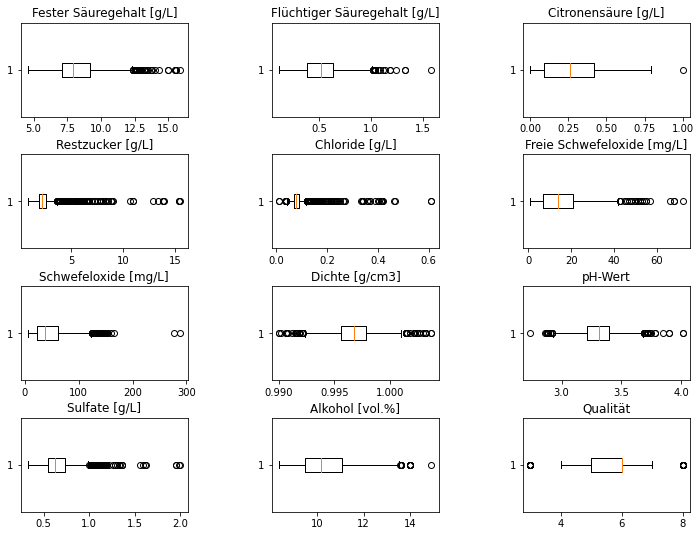

In [35]:
hist(df_red)
box_plot(df_red)

In [36]:
def print_outliers(df, min_z_score):
    # Z-Score ist die Abweichung vom Mittelwert in Standardabweichungen
    # betragsmäßig hoher Z-Score deutet auf Ausreißer hin.
    z = np.abs(stats.zscore(df))

    for i, column in enumerate(columns):
        print("\n")
        print(column)

        filter = (z[column] > min_z_score)
        if "fixed_filter" in columns[column].keys():
            filter = (df[column] > columns[column]["fixed_filter"])
        print(df[filter].sort_values(by=column))

#box_plot(df_white)
#box_plot(df_red)
print_outliers(df_white, 3.5)




fixed acidity
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4259            3.8             0.310         0.02            11.1      0.036   
4787            3.9             0.225         0.40             4.2      0.030   
1951            9.9             1.005         0.46             1.4      0.046   
2162            9.9             0.490         0.23             2.4      0.087   
358            10.0             0.200         0.39             1.4      0.050   
1856           10.0             0.910         0.42             1.6      0.056   
1900           10.0             0.230         0.27            14.1      0.033   
207            10.2             0.440         0.88             6.2      0.049   
873            10.3             0.170         0.47             1.4      0.037   
1239           10.3             0.250         0.48             2.2      0.042   
1372           10.7             0.220         0.56             8.2      0.044   
1373        

### Ergebnisse

Es gibt viele Ausreißer.
Fehlmessungen werden aufgrund physikalischer Zusammenhänge einiger Spalten ausgeschlossen.

Die Ausreißer sind vermutlich der Tatsache geschuldet, dass Wein ein Naturprodukt ist.
Da der Fokus nicht auf Nischenprodukten oder Ausschussware liegt, werden Ausreißer entfernt.

In [37]:
# Extrem hohe Citronensäure, sehr hoher Alkohlgehalt, sehr niedriger PH-Wert
print(df_red.loc[652])

# Extrem hohe Citronensäure, sehr niedriger PH-Wert
# Extrem hohe Chlorid-Werte üblich bei Meernahen Weinanbaugebieten wie Portugal
# https://www.institut-heidger.de/anionen/.
print(df_red.loc[151])

fixed acidity           15.9000
volatile acidity         0.3600
citric acid              0.6500
residual sugar           7.5000
chlorides                0.0960
free sulfur dioxide     22.0000
total sulfur dioxide    71.0000
density                  0.9976
pH                       2.9800
sulphates                0.8400
alcohol                 14.9000
quality                  5.0000
Name: 652, dtype: float64
fixed acidity            9.2000
volatile acidity         0.5200
citric acid              1.0000
residual sugar           3.4000
chlorides                0.6100
free sulfur dioxide     32.0000
total sulfur dioxide    69.0000
density                  0.9996
pH                       2.7400
sulphates                2.0000
alcohol                  9.4000
quality                  4.0000
Name: 151, dtype: float64


In [ ]:
# Datensatz bereinigen
def remove_outliers(df, max_z_score):
    z = np.abs(stats.zscore(df.iloc[:,:-1]))
    #TODO: dont filter good/bad quality wines
    filter = (z < max_z_score).all(axis=1)
    return df[filter]

In [ ]:
hist(df_red)
df_red = remove_outliers(df_red, 2.5)
hist(df_red)
#df_red.to_csv('./winequality-red-filtered.csv', sep=';', header=True, index=False)

In [ ]:
hist(df_white)
df_white = remove_outliers(df_white, 2.5)
hist(df_white)
#df_white.to_csv('./winequality-white-filtered.csv', sep=';', header=True, index=False)

## Zusammenhänge
- Zusammenhang: Feste Säure - Citronensäure - PH-Wert - Dichte
- Zusammenhang: Schwefeloxide - freie Schwefeloxide
- Zusammenhang: Flüchtige Säuren - Akohol - Qualität

In [39]:
def scatter(df, columns):
    pd.plotting.scatter_matrix(df[columns],
        figsize=(15, 15),
        marker="o",
        c=df['quality'].values,
        s=30,
        alpha=0.8,
    )
    plt.show()

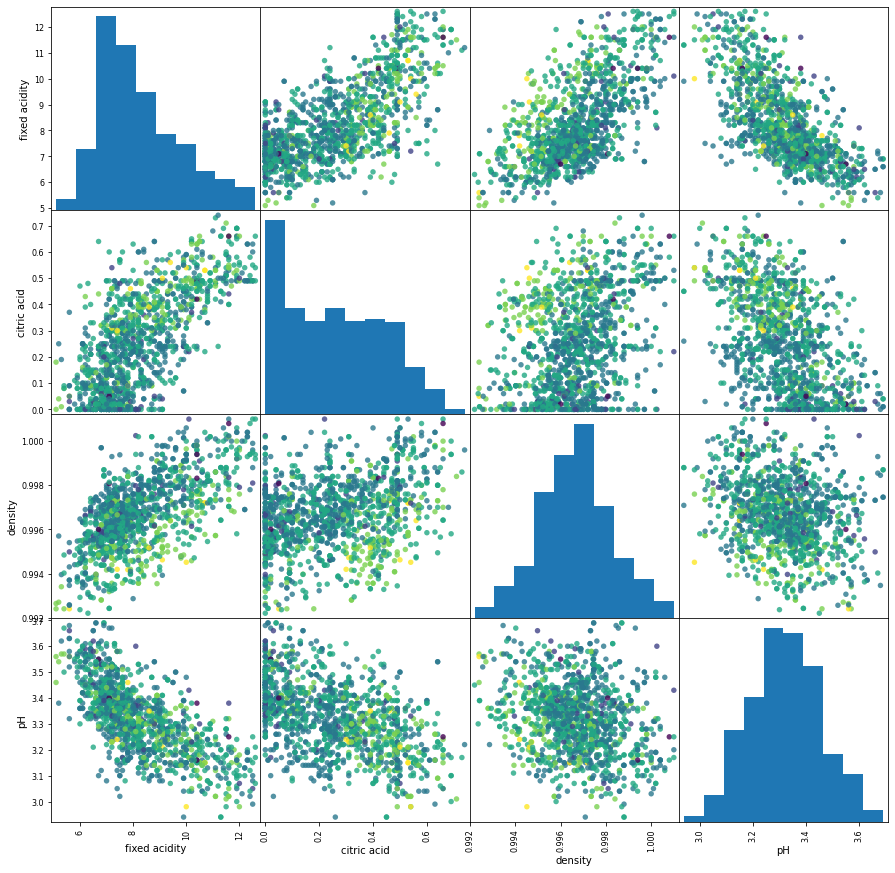

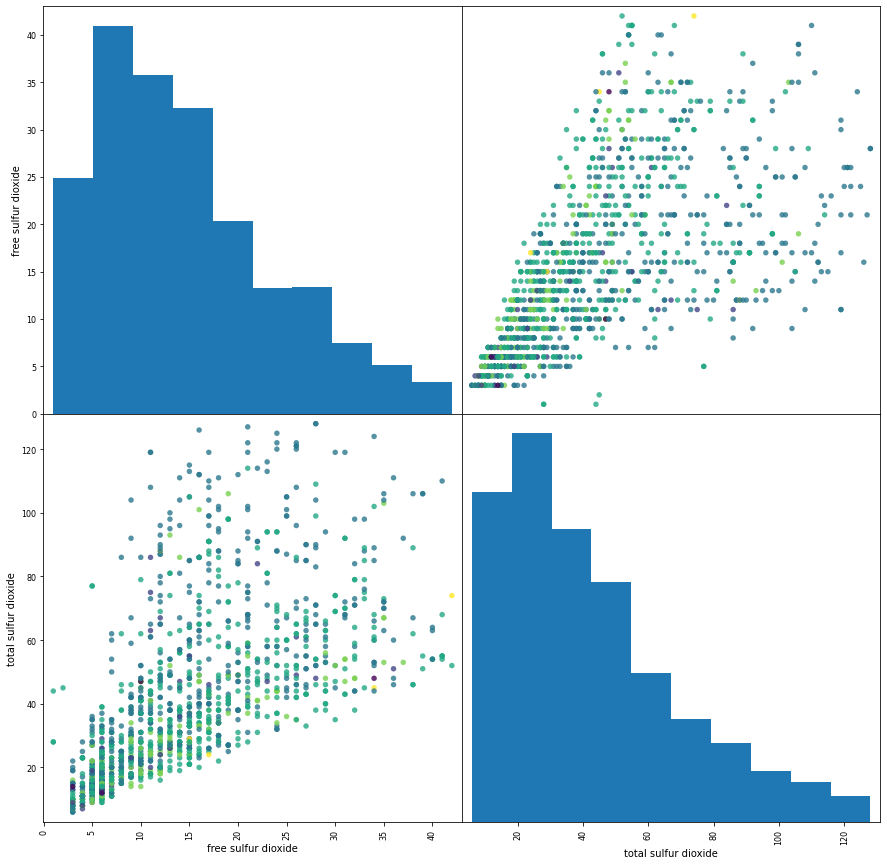

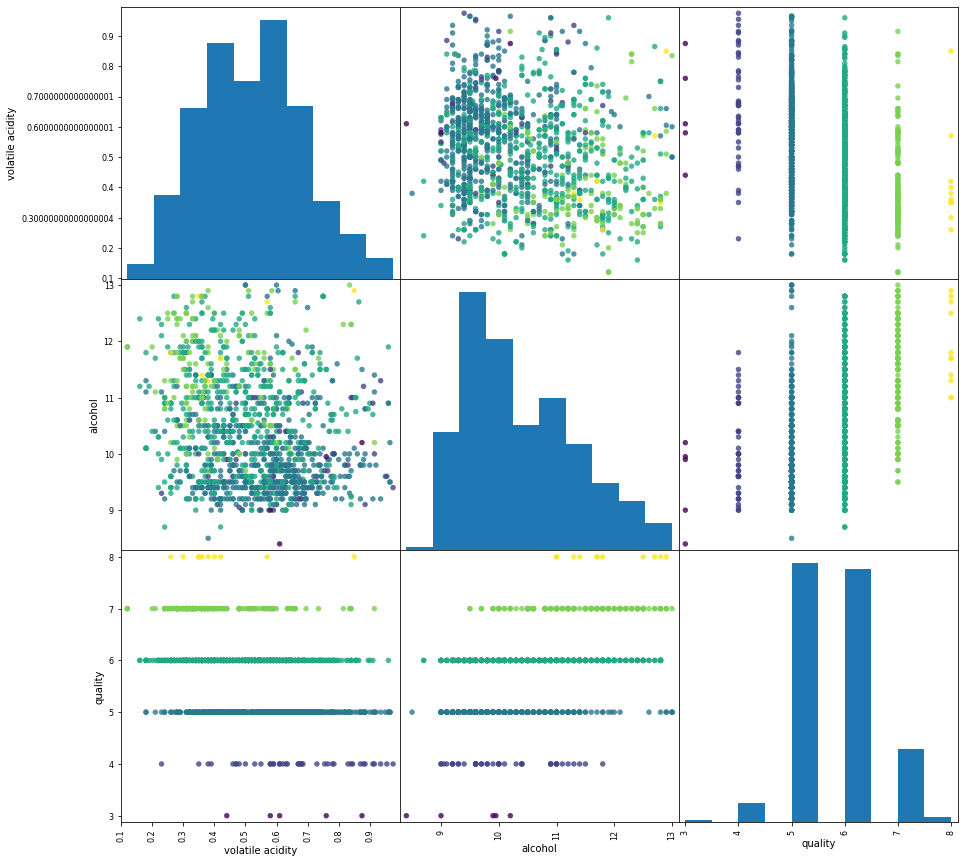

In [40]:

scatter(df_red, ["fixed acidity","citric acid","density","pH"])
scatter(df_red, ["free sulfur dioxide","total sulfur dioxide"])
scatter(df_red, ["volatile acidity","alcohol","quality"])

In [41]:
# Einteilung in je 3 Klassen (unter 25%, 25-75%, ueber 75% Quantil)
# ==> Binäre Matrix für mlextends Funktionen
df = pd.DataFrame()
for c in columns.keys():
    q_25 = df_red[c].quantile(q=0.25)
    q_75 = df_red[c].quantile(q=0.75)
    print(f'{c}:  {q_25}  {q_75}')
    #df[f'{c}_low'] = df_red[c].le(q_25).astype(int)
    #df[f'{c}_mid'] = df_red[c].between(q_25, q_75, inclusive='right').astype(int)
    df[f'{c}_low'] = df_red[c].le(q_75).astype(int)
    df[f'{c}_high'] = df_red[c].gt(q_75).astype(int)

fixed acidity:  7.1  9.1
volatile acidity:  0.39  0.63
citric acid:  0.08  0.4
residual sugar:  1.9  2.5
chlorides:  0.07  0.089
free sulfur dioxide:  7.0  20.0
total sulfur dioxide:  21.0  56.0
density:  0.9956  0.99761
pH:  3.22  3.4
sulphates:  0.55  0.71
alcohol:  9.5  11.0
quality:  5.0  6.0


In [42]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

#TODO
# support min 5% (sonst nicht aussagekräftig)
# alle kombinationen aus 2/3 klassen und max_len=2/3/4
# hohe konfidenz
# hoher lift
# lift bei 1
# kleiner lift

In [43]:
# hohe konfidenz
""" Ergebnis:
- zusammenhang niedriger freier schwefelanteil und niedriger gesamtschwefelanteil
- wenig alkohol -> niedrigere qualitaet (wenig alkhol, weniger suesse trauben, billiger)
- wenig sulfate -> niedrigere qualitaet
- viel schwefel -> niedrigere qualitaet (schwefel = haltbarkeitsmittel, mehr noetig bei faulen trauben)
- hohe fluechtige saeureanteile -> niedrigere qualitaet
- zusammenhang hohe citronensaeuere und viel feste saeure
- zusammenhang ph-wert saeure
- zusammenhang freier und gesamt schwefel
- zusammenhang hoher alkohol -> geringe dichte
==> zusammenhaenge bestaetigt
==> neu: kriterien fuer schlechten wein gefunden (lift allerdings oft nicht hoch)

2 Klassen:
- hohe dichte -> alkohol low und geringere qualitaet
- wenig citronensaeure -> qualiaet low (geringer lift)
- ph high -> qualitaet low (geringer lift)
"""
# Auch mit max_len=3 und head(30) getestet
analysis = apriori(df, min_support=0.05, use_colnames=True, max_len=2)
rules = association_rules(analysis, min_threshold=0.00)
rules.sort_values(by="confidence", ascending=False, inplace=True)
print(rules.head(20))

                     antecedents                 consequents  antecedent support  consequent support   support  confidence      lift  leverage  conviction
82            (citric acid_high)      (volatile acidity_low)            0.249813            0.752431  0.243082    0.973054  1.293214  0.055115    9.187568
121      (volatile acidity_high)           (citric acid_low)            0.247569            0.750187  0.240838    0.972810  1.296756  0.055115    9.187568
30                     (pH_high)         (fixed acidity_low)            0.249065            0.757666  0.240838    0.966967  1.276244  0.052129    7.336098
404  (total sulfur dioxide_high)               (quality_low)            0.248317            0.872850  0.240090    0.966867  1.107714  0.023346    3.837628
69          (fixed acidity_high)                    (pH_low)            0.242334            0.750935  0.234106    0.966049  1.286462  0.052129    7.336098
149      (volatile acidity_high)               (quality_low)          

In [ ]:
# hoher lift
"""Erkenntnis
- alkohol high -> quality high (geringe konfidenz aber hoher lift)
- fluechtige saeuren low -> quality_high (geringe konfidenz, aber hoher lift)
- viele sulfate -> quality high
==> nicht auschlaggebend, aber macht guten wein wahrscheinlicher, als 2./3. auswahlkriterium

2 Klassen:
- viel citronensaeure -> quality high (gerine konfidenz)
"""
analysis = apriori(df, min_support=0.05, use_colnames=True, max_len=2)
rules = association_rules(analysis, min_threshold=0.00)
rules.sort_values(by="lift", ascending=False, inplace=True)
print(rules.head(20))

In [ ]:
# lift near 1
""" Erkenntis
Leider Attribute findbar die keinen Einfluss auf gut/schlechte Qualitaet haben.
=> So notieren und zeigen, dass man an lift near 1 gedacht hat

2 Klassen (Mit max_len2):
hoher restzucker, wenig fluechtige, .... -> keinen Einfluss auf qualitaet low
"""
analysis = apriori(df, min_support=0.05, use_colnames=True, max_len=2)
rules = association_rules(analysis, min_threshold=0.00)
rules = rules[rules.lift.between(0.95,1.05)]
rules = rules[rules.consequents.apply(lambda c: bool(c.intersection({"quality_low","quality_mid","quality_high"})))]
rules.sort_values(by="lift", ascending=True, inplace=True)
print(rules)

In [ ]:
# lift low
""" Erkenntis
- wenig freie sauere -> unwahrscheinlicher dass wein schlecht
- viele sulfate -> unwahrscheinlicher dass wein schlecht
- mittlere dicht -> hoher alkohol gehalt unwahrscheinlicher

2 Klassen (und max_len=2)
- wenig alk -> guter wein unwahrscheinlicher
- und viel mehr
"""
analysis = apriori(df, min_support=0.05, use_colnames=True, max_len=2)
rules = association_rules(analysis, min_threshold=0.00)
rules = rules[rules.consequents.apply(lambda c: bool(c.intersection({"quality_low","quality_mid","quality_high"})))]
rules.sort_values(by="lift", ascending=True, inplace=True)
print(rules.head(30))